<a href="https://colab.research.google.com/github/dominikwernerwolf/coursera/blob/main/Saving_and_loading_model_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [69]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

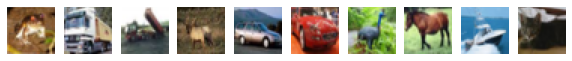

In [70]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

#### Introduce two useful functions

In [4]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [5]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [6]:
# Create an instance of the model and show model summary

model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14,514
Trainable params: 14,514
Non-traina

In [7]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.097


#### Train model with checkpoints

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
# Create Tensorflow checkpoint object

checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             frequency='epoch',
                             save_weights_only=True,
                             verbose=1)

In [10]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch

model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint])

Epoch 1/3
311/313 [============================>.] - ETA: 0s - loss: 2.0488 - accuracy: 0.2448
Epoch 1: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 10s 31ms/step - loss: 2.0472 - accuracy: 0.2453
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.7073 - accuracy: 0.3745
Epoch 2: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 9s 30ms/step - loss: 1.7069 - accuracy: 0.3749
Epoch 3/3
311/313 [============================>.] - ETA: 0s - loss: 1.5453 - accuracy: 0.4365
Epoch 3: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 9s 30ms/step - loss: 1.5443 - accuracy: 0.4370


In [11]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Oct 16 11:17 checkpoint
-rw-r--r-- 1 root root 174K Oct 16 11:17 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:17 checkpoint.index


In [12]:
# Evaluate the performance of the trained model

get_test_accuracy(model, x_test, y_test)

accuracy: 0.434


#### Create new model, load weights

In [13]:
# Create a new instance of the (initialised) model, accuracy around 10% again

model = get_new_model()
get_test_accuracy(model, x_test, y_test)

accuracy: 0.100


In [14]:
# Load weights -- accuracy is the same as the trained model

model.load_weights(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

accuracy: 0.434


#### Clear directory

In [15]:
! rm -r model_checkpoints

***
<a id="coding_tutorial_2"></a>
## Model saving criteria

#### Create more customised checkpoint

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
# Create Tensorflow checkpoint object with epoch and batch details

checkpoint_500_path = 'model_checkpoints_500/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_500 = ModelCheckpoint(filepath=checkpoint_500_path,
                                  save_weights_only=True,
                                  save_freq=500,
                                  verbose=1)

In [18]:
# Create and fit model with checkpoint

model = get_new_model()
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_500])

Epoch 1/3


 497/1000 [=============>................] - ETA: 5s - loss: 2.0084 - accuracy: 0.2561
Epoch 1: saving model to model_checkpoints_500/checkpoint_01_0500
 998/1000 [============================>.] - ETA: 0s - loss: 1.8536 - accuracy: 0.3211
Epoch 1: saving model to model_checkpoints_500/checkpoint_01_1000
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8532 - accuracy: 0.3214 - val_loss: 1.6419 - val_accuracy: 0.4080
Epoch 2/3
 499/1000 [=============>................] - ETA: 6s - loss: 1.5661 - accuracy: 0.4359
Epoch 2: saving model to model_checkpoints_500/checkpoint_02_0500
 995/1000 [============================>.] - ETA: 0s - loss: 1.5274 - accuracy: 0.4588
Epoch 2: saving model to model_checkpoints_500/checkpoint_02_1000
1000/1000 [==============================] - 13s 13ms/step - loss: 1.5284 - accuracy: 0.4583 - val_loss: 1.4705 - val_accuracy: 0.4670
Epoch 3/3
 496/1000 [=============>................] - ETA: 5s - loss: 1.4077 - accuracy: 0.4915
Epoch 3: sa

In [19]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints_500

total 1.1M
-rw-r--r-- 1 root root   93 Oct 16 11:29 checkpoint
-rw-r--r-- 1 root root 174K Oct 16 11:28 checkpoint_01_0500.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:28 checkpoint_01_0500.index
-rw-r--r-- 1 root root 174K Oct 16 11:28 checkpoint_01_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:28 checkpoint_01_1000.index
-rw-r--r-- 1 root root 174K Oct 16 11:29 checkpoint_02_0500.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:29 checkpoint_02_0500.index
-rw-r--r-- 1 root root 174K Oct 16 11:29 checkpoint_02_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:29 checkpoint_02_1000.index
-rw-r--r-- 1 root root 174K Oct 16 11:29 checkpoint_03_0500.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:29 checkpoint_03_0500.index
-rw-r--r-- 1 root root 174K Oct 16 11:29 checkpoint_03_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:29 checkpoint_03_1000.index


#### Work with model saving criteria

In [45]:
# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]
print(x_test.shape)

(100, 32, 32, 3)


In [59]:
# Create a new instance of untrained model

model = get_new_model()

In [60]:
# Create Tensorflow checkpoint object which monitors the validation accuracy

checkpoint_best_path = 'model_checkpoints_best/checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  verbose=1)

In [61]:
# Fit the model and save only the weights with the highest validation accuracy

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_best], verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.08000, saving model to model_checkpoints_best/checkpoint

Epoch 2: val_accuracy did not improve from 0.08000

Epoch 3: val_accuracy did not improve from 0.08000

Epoch 4: val_accuracy did not improve from 0.08000

Epoch 5: val_accuracy did not improve from 0.08000

Epoch 6: val_accuracy improved from 0.08000 to 0.10000, saving model to model_checkpoints_best/checkpoint

Epoch 7: val_accuracy improved from 0.10000 to 0.11000, saving model to model_checkpoints_best/checkpoint

Epoch 8: val_accuracy improved from 0.11000 to 0.12000, saving model to model_checkpoints_best/checkpoint

Epoch 9: val_accuracy improved from 0.12000 to 0.14000, saving model to model_checkpoints_best/checkpoint

Epoch 10: val_accuracy did not improve from 0.14000

Epoch 11: val_accuracy improved from 0.14000 to 0.19000, saving model to model_checkpoints_best/checkpoint

Epoch 12: val_accuracy did not improve from 0.19000

Epoch 13: val_accuracy did not improve from 0

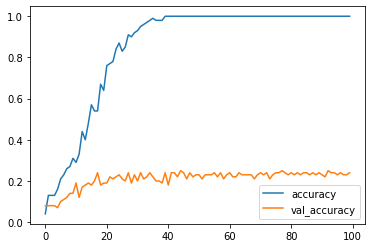

In [62]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [63]:
# Inspect the checkpoint directory

! ls -lh model_checkpoints_best

total 184K
-rw-r--r-- 1 root root   77 Oct 16 11:46 checkpoint
-rw-r--r-- 1 root root 174K Oct 16 11:46 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 11:46 checkpoint.index


In [64]:
# Create a new model with the saved weights

new_model = get_new_model()
new_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_model, x_test, y_test)

accuracy: 0.250


#### Clear directory

In [65]:
! rm -r model_checkpoints_best

***
<a id="coding_tutorial_3"></a>
## Saving the entire model

#### Create checkpoint that saves whole model, not just weights

In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [71]:
# Create Tensorflow checkpoint object

checkpoint_path = 'model_checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=False,
                             frequency='epoch',
                             verbose=1)

In [72]:
# Create and fit model with checkpoint

model = get_new_model()
model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint])

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.9394 - accuracy: 0.2874
Epoch 1: saving model to model_checkpoints


313/313 [==============================] - 11s 34ms/step - loss: 1.9391 - accuracy: 0.2872
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.6026 - accuracy: 0.4198
Epoch 2: saving model to model_checkpoints


313/313 [==============================] - 10s 33ms/step - loss: 1.6026 - accuracy: 0.4198
Epoch 3/3
313/313 [==============================] - ETA: 0s - loss: 1.4840 - accuracy: 0.4640
Epoch 3: saving model to model_checkpoints


313/313 [==============================] - 10s 32ms/step - loss: 1.4840 - accuracy: 0.4640


#### Inspect what the checkpoint has created

In [73]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints

total 148K
drwxr-xr-x 2 root root 4.0K Oct 16 12:19 assets
-rw-r--r-- 1 root root  14K Oct 16 12:21 keras_metadata.pb
-rw-r--r-- 1 root root 123K Oct 16 12:21 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct 16 12:21 variables


In [74]:
# Enter variables directory

! ls -lh model_checkpoints/variables

total 184K
-rw-r--r-- 1 root root 179K Oct 16 12:21 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Oct 16 12:21 variables.index


In [75]:
# Get the model's test accuracy

get_test_accuracy(model, x_test, y_test)

accuracy: 0.502


#### Create new model from scratch

In [76]:
# Delete model

del model

In [77]:
from tensorflow.keras.models import load_model

In [79]:
# Reload model from scratch

model = load_model(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

accuracy: 0.502


#### Use the .h5 format to save model

In [80]:
# Save the model in .h5 format

model.save('my_model.h5')

In [81]:
# Inspect .h5 file

! ls -lh my_model.h5

-rw-r--r-- 1 root root 78K Oct 16 12:27 my_model.h5


In [82]:
# Delete model

del model

In [83]:
# Reload model from scratch

model = load_model('my_model.h5')
get_test_accuracy(model, x_test, y_test)

accuracy: 0.502


#### Clear directory

In [84]:
! rm -r model_checkpoints
! rm my_model.h5

***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model using the Keras API.

In [85]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [86]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

#### Import and preprocess 3 sample images

In [87]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [88]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [89]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

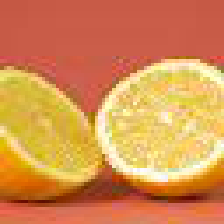

In [90]:
# Display image

lemon_img

In [91]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

35363/35363 [==============================] - 0s 0us/step


,prediction,probability
1,consomme,0.227801
2,lemon,0.221757
3,eggnog,0.151335
4,ladle,0.040088
5,spotlight,0.029197


##### Image 2: viaduct

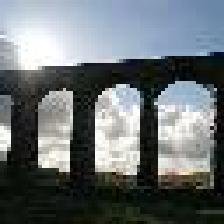

In [92]:
# Display image

viaduct_img

In [93]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

1/1 [==============================] - 0s 415ms/step


,prediction,probability
1,vault,0.367951
2,prison,0.111742
3,viaduct,0.110738
4,window_screen,0.088231
5,fire_screen,0.020675


##### Image 3: water tower

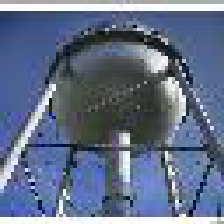

In [94]:
# Display image

water_tower_img

In [95]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

1/1 [==============================] - 0s 182ms/step


,prediction,probability
1,solar_dish,0.384682
2,ladle,0.196178
3,planetarium,0.116683
4,strainer,0.04999
5,jigsaw_puzzle,0.021947


***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model from TensorFlow Hub.

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Build Google's Mobilenet v1 model

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

#### Use MobileNet model to classify images

In [ ]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [ ]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

In [ ]:
# Read in categories text file

with open('data/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [ ]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

##### Image 1: lemon

##### Image 2: viaduct

##### Image 3: water tower